In [459]:
import os 
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelBinarizer, LabelEncoder

warnings.filterwarnings('ignore')

# Read and Describe Data

In [460]:
data_file = 'Leads.csv'


In [461]:
df = pd.read_csv(data_file)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [462]:
df.columns = ['propId', 'leadNum', 'leadOrgn', 'leadSrc', 'email', 'call', 'converted', 'totalVisits', 'totalTimeSpent', 'pageView', 
              'lastActivity', 'country', 'specialization', 'heardSource', 'currOcc', 'matterMost', 'search', 'magazine', 'article', 
              'forums', 'newspaper', 'digitalAdvert', 'recommendation', 'receiveUpdates', 'tags', 'leadQuality', 'updateSCC', 'updateDM', 
              'leadProfile', 'city', 'AsyActivityIdx', 'AsyProfileIdx' ,'AsyActivityScore', 'AsyProfileScore', 'cheque', 'masteringInterview', 
              'lastNotableActivity']

In [463]:
df.head()

,propId,leadNum,leadOrgn,leadSrc,email,call,converted,totalVisits,totalTimeSpent,pageView,lastActivity,country,specialization,heardSource,currOcc,matterMost,search,magazine,article,forums,newspaper,digitalAdvert,recommendation,receiveUpdates,tags,leadQuality,updateSCC,updateDM,leadProfile,city,AsyActivityIdx,AsyProfileIdx,AsyActivityScore,AsyProfileScore,cheque,masteringInterview,lastNotableActivity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [464]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   propId               9240 non-null   object 
 1   leadNum              9240 non-null   int64  
 2   leadOrgn             9240 non-null   object 
 3   leadSrc              9204 non-null   object 
 4   email                9240 non-null   object 
 5   call                 9240 non-null   object 
 6   converted            9240 non-null   int64  
 7   totalVisits          9103 non-null   float64
 8   totalTimeSpent       9240 non-null   int64  
 9   pageView             9103 non-null   float64
 10  lastActivity         9137 non-null   object 
 11  country              6779 non-null   object 
 12  specialization       7802 non-null   object 
 13  heardSource          7033 non-null   object 
 14  currOcc              6550 non-null   object 
 15  matterMost           6531 non-null   o

In [465]:
df.describe()

,leadNum,converted,totalVisits,totalTimeSpent,pageView,AsyActivityScore,AsyProfileScore
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [466]:
nullCount = pd.DataFrame(df.isnull().sum() , columns=['nullCount'])
nullCount['%ageNullCount'] = round( nullCount.nullCount * 100 / len(df), 2)
nullCount
# Many values are missing

,nullCount,%ageNullCount
propId,0,0.00
leadNum,0,0.00
leadOrgn,0,0.00
leadSrc,36,0.39
email,0,0.00
call,0,0.00
converted,0,0.00
totalVisits,137,1.48
totalTimeSpent,0,0.00
pageView,137,1.48


In [467]:
# remove 1% missing value
df = df[~df.totalVisits.isna()]

In [468]:
cat_cols = []
num_cols = []

for col_name in df.columns:
  if df[col_name].dtype == 'object':
    cat_cols.append(col_name)
  elif df[col_name].dtype == 'float64' or df[col_name].dtype == 'int64':
    num_cols.append(col_name)

print(f'Categorical Columns : {cat_cols}')
print(f'Numeric Columns : {num_cols}')

Categorical Columns : ['propId', 'leadOrgn', 'leadSrc', 'email', 'call', 'lastActivity', 'country', 'specialization', 'heardSource', 'currOcc', 'matterMost', 'search', 'magazine', 'article', 'forums', 'newspaper', 'digitalAdvert', 'recommendation', 'receiveUpdates', 'tags', 'leadQuality', 'updateSCC', 'updateDM', 'leadProfile', 'city', 'AsyActivityIdx', 'AsyProfileIdx', 'cheque', 'masteringInterview', 'lastNotableActivity']
Numeric Columns : ['leadNum', 'converted', 'totalVisits', 'totalTimeSpent', 'pageView', 'AsyActivityScore', 'AsyProfileScore']


# Check target class

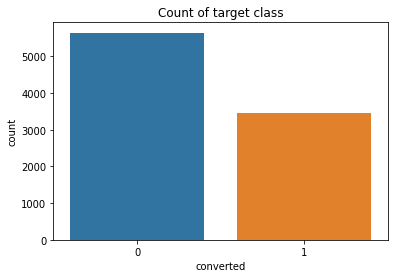

In [469]:
# plotting the count of target variable
sns.countplot(df.converted)
plt.title('Count of target class')
plt.show()

In [470]:

pd.DataFrame({'ClassCount': df.converted.value_counts(),
              '%ClassCount' : round(df.converted.value_counts() * 100 / len(df), 2)
              })

,ClassCount,%ClassCount
0,5642,61.98
1,3461,38.02


- Target class is imbalaced. Need to use class weight while modelling.











# Univariate / Multivariate Analysis

 - perform the EDA here
    - draw countplot
    - draw countplot with hue for different classses
    - write your analysis result 

In [471]:
df_new = df.copy()

### leadOrgn

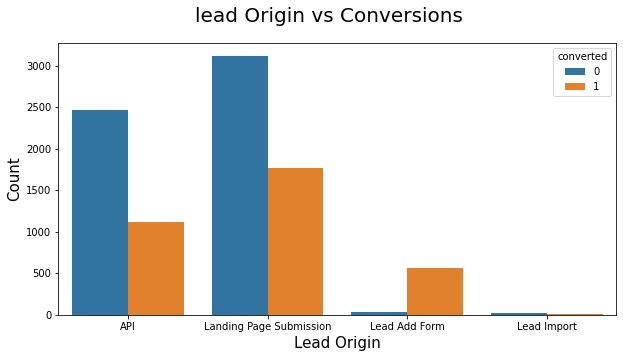

In [472]:
# leadOrgn Vs converted
plt.figure(figsize=(10, 5))
sns.countplot(df_new['leadOrgn'], hue=df_new.converted)
plt.suptitle('lead Origin vs Conversions', fontsize=20)
plt.xlabel('Lead Origin',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

Inference
- Landing Page Submission & API getting the higher number of leads. And the conversion rate is also impressive.
- Lead Add Form has a higher conversion rate but the number of leads is less.
- Landing Page Submission & API has a significant number of leads, but we need to focus on the improvement of the conversion rate.
- The conversion rate of the Lead Add Form is higher but we need to generate more leads through Lead Add Form.

### leadSrc

In [473]:
df_new['leadSrc'].isnull().sum()

29

In [474]:
df_new['leadSrc'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
NC_EDM                  1
blog                    1
Pay per Click Ads       1
testone                 1
welearnblog_Home        1
WeLearn                 1
Name: leadSrc, dtype: int64

- We have seen that "Google" & "google" appeared in the column this might be due to typing error so we need to merge these two columns.
- We have total 29 null values and we will impute them in mode imputation With Google.


In [475]:
# Merging Google's columns
df_new['leadSrc'] = df_new['leadSrc'].replace('google', 'Google')

#Imputing null values with Google
df.leadSrc.fillna('Google', inplace=True)

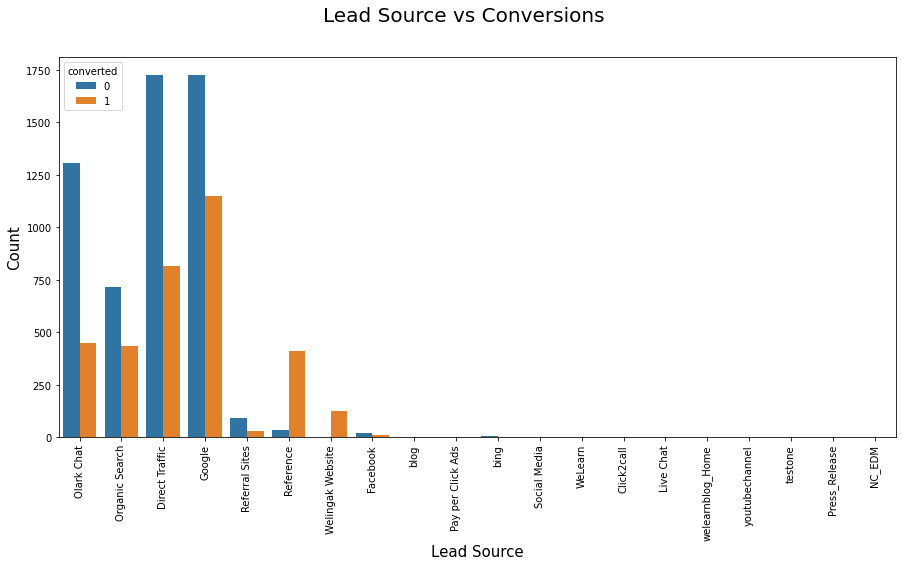

In [476]:
# leadSrc Vs converted
plt.figure(figsize=(15, 7))
sns.countplot(df_new['leadSrc'], hue=df_new.converted)
plt.suptitle('Lead Source vs Conversions', fontsize=20)
plt.xlabel('Lead Source',fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('Count',fontsize=15)
plt.show()

Inference
- Google and Direct traffic generated a higher number of leads as well as conversions.
- "Reference" and "welingak Website" have a higher conversion rate but fewer leads.
- Olark Chat, Organic Search, Direct Traffic, and Google for these sources we need to focus on improvement of Conversion rate and need generate more leads from Reference and Welingak Website.

### Email

In [477]:
#Unique value counts
df_new['email'].value_counts()

No     8379
Yes     724
Name: email, dtype: int64

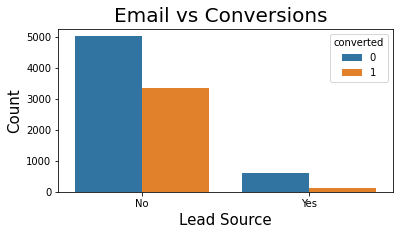

In [478]:
# Email Vs converted
plt.figure(figsize=(6, 3))
sns.countplot(df_new['email'], hue=df_new.converted)
plt.suptitle('Email vs Conversions', fontsize=20)
plt.xlabel('Lead Source',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

- Do not email column seems totally imbalance we are not considering it for analysis

### Call

In [479]:
#Unique value counts
df_new['call'].value_counts()

No     9101
Yes       2
Name: call, dtype: int64

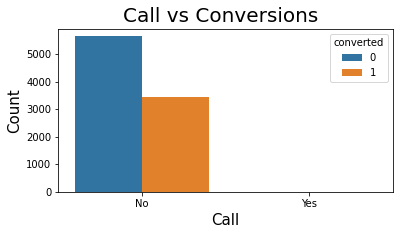

In [480]:
# Call Vs converted
plt.figure(figsize=(6, 3))
sns.countplot(df_new['call'], hue=df_new.converted)
plt.suptitle('Call vs Conversions', fontsize=20)
plt.xlabel('Call',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

- Like Do not Email column, this column is also  imbalanced

### Last Activity

In [481]:
# Null values count
df_new['lastActivity'].isnull().sum()

0

In [482]:
# Value counts for each element
df_new['lastActivity'].value_counts()

Email Opened                    3437
SMS Sent                        2738
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      61
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: lastActivity, dtype: int64

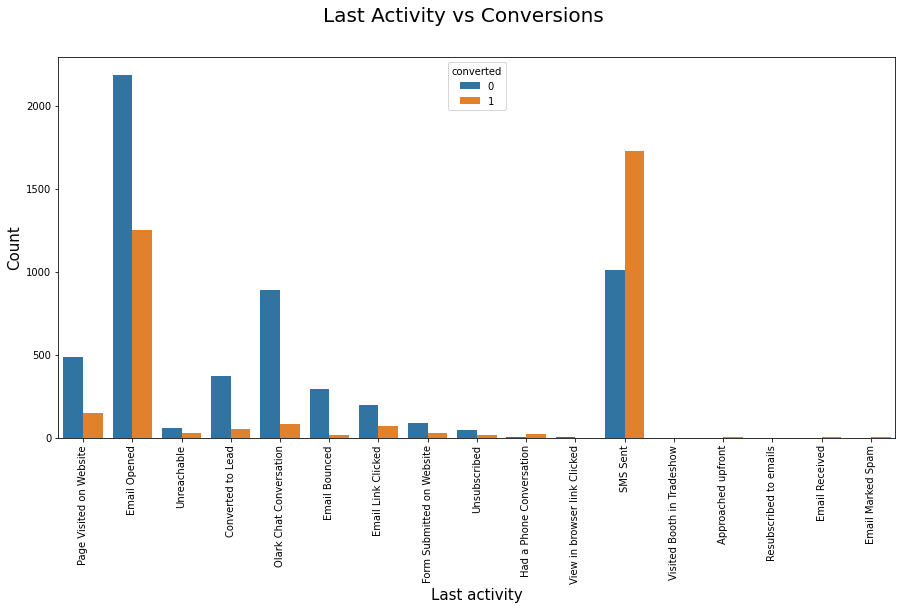

In [483]:
plt.figure(figsize=(15, 7))
sns.countplot(df_new['lastActivity'], hue=df_new.converted)
plt.suptitle('Last Activity vs Conversions', fontsize=20)
plt.xlabel('Last activity',fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('Count',fontsize=15)
plt.show()

Inference
- From the above graph, we can see that the Last actives of the users "Email Opend" and "SMS sent" have a higher conversion rate.

- "Olark chat conversion" and "Page visited on Website" received a significant number of leads but the conversion rate is not so impressive.We need to try to convert them.

### Country

In [484]:
# Null values count
df_new['country'].isnull().sum()

2324

In [485]:
#checking value counts
df_new['country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Nigeria                    4
Kuwait                     4
Canada                     4
Germany                    4
South Africa               4
Sweden                     3
Philippines                2
Ghana                      2
China                      2
Uganda                     2
Netherlands                2
Bangladesh                 2
Italy                      2
Asia/Pacific Region        2
Belgium                    2
Sri Lanka                  1
Vietnam                    1
Tanzania                   1
Switzerland                1
Kenya                      1
Indonesia                  1
Russia        

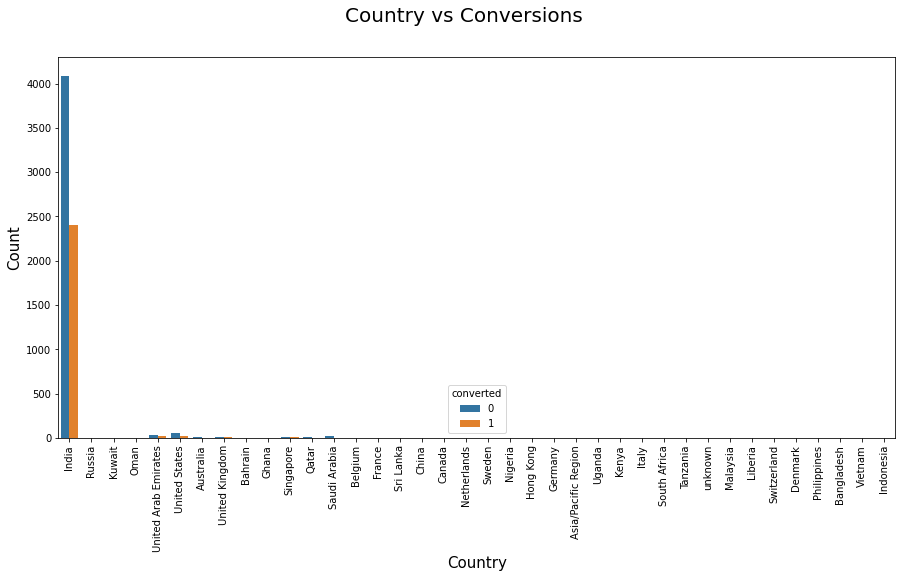

In [486]:
plt.figure(figsize=(15, 7))
sns.countplot(df_new['country'], hue=df_new.converted)
plt.suptitle('Country vs Conversions', fontsize=20)
plt.xlabel('Country',fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('Count',fontsize=15)
plt.show()

- Most of the traffic comes from India so it doesn't make sense to consider this variable in the analysis.

### Specialzation

In [487]:
# Null values count
df_new['specialization'].isnull().sum()

1431

In [488]:
#checking value counts
df_new['specialization'].value_counts()

Select                               1873
Finance Management                    962
Human Resource Management             838
Marketing Management                  824
Operations Management                 500
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 157
Hospitality Management                111
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: specialization, dtype: int64

'Select' is a default option which is equvalent to Null value so we can merge the Null values with Select.

In [489]:
df_new['specialization'].fillna('Select', inplace=True)

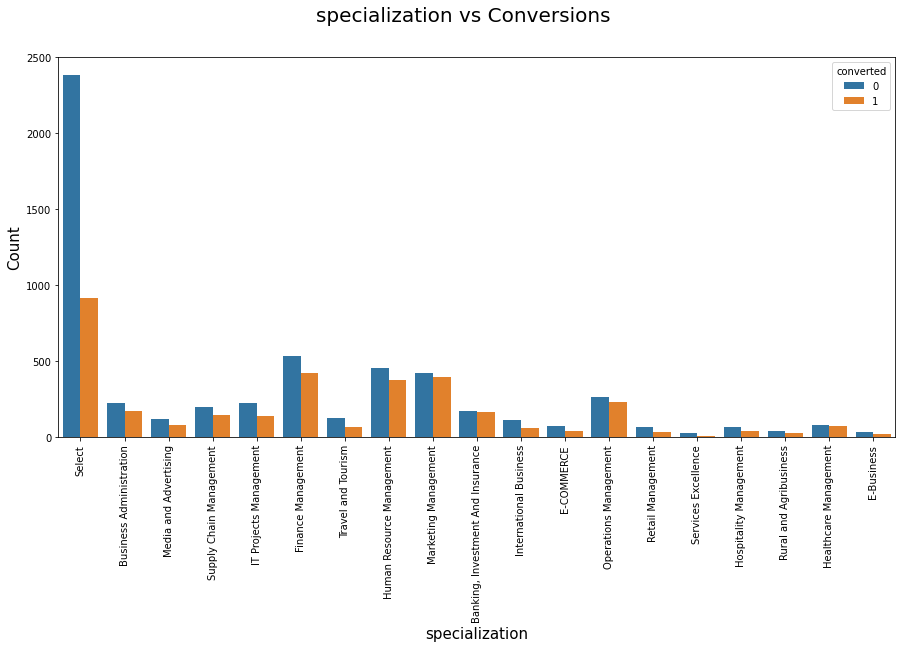

In [490]:
plt.figure(figsize=(15, 7))
sns.countplot(df_new['specialization'], hue=df_new.converted)
plt.suptitle('specialization vs Conversions', fontsize=20)
plt.xlabel('specialization',fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('Count',fontsize=15)
plt.show()

Inference
- Apart from "Select" (Which is a default option) Finance Management, Human Resource Management, & Marketing Management have good conversion rate we need focus should be more on them.

### How did you hear about X Education

In [491]:
#Count of null values
df_new['heardSource'].isnull().sum()

2200

In [492]:
#Count of unique values
df_new['heardSource'].value_counts()

Select                   4914
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               66
Email                      26
SMS                        23
Name: heardSource, dtype: int64

Imputing the null values with "Select"

In [493]:
#Imputing the null values with "Select"
df_new['heardSource'].fillna('Select', inplace=True)

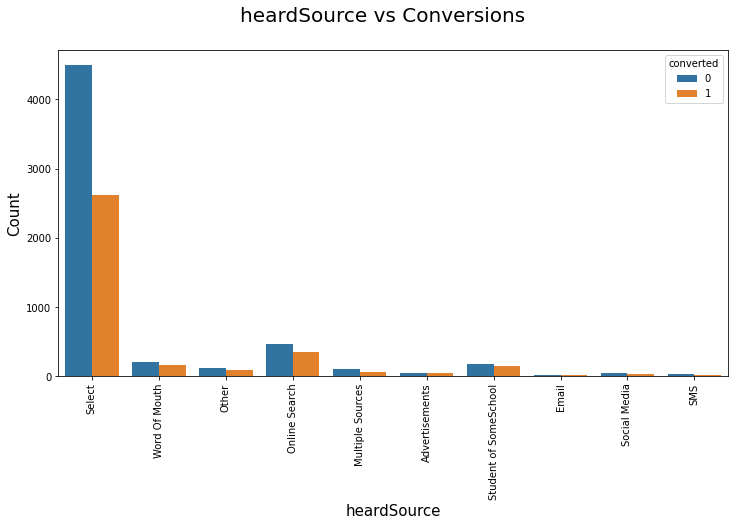

In [494]:
plt.figure(figsize=(12, 6))
sns.countplot(df_new['heardSource'], hue=df_new.converted)
plt.suptitle('heardSource vs Conversions', fontsize=20)
plt.xlabel('heardSource',fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('Count',fontsize=15)
plt.show()

Inference
- Most of the leads have the "Select" option which is a default option, Nothing can be drawn from this variable.

### What is your current occupation

In [495]:
# checke Null values
df_new['currOcc'].isnull().sum()

2683

In [496]:
#Count the value of each element
df_new['currOcc'].value_counts()

Unemployed              5502
Working Professional     679
Student                  207
Other                     15
Housewife                  9
Businessman                8
Name: currOcc, dtype: int64

In [497]:
#Impute the null to 'other'
df_new['currOcc'].fillna('Other',inplace=True)

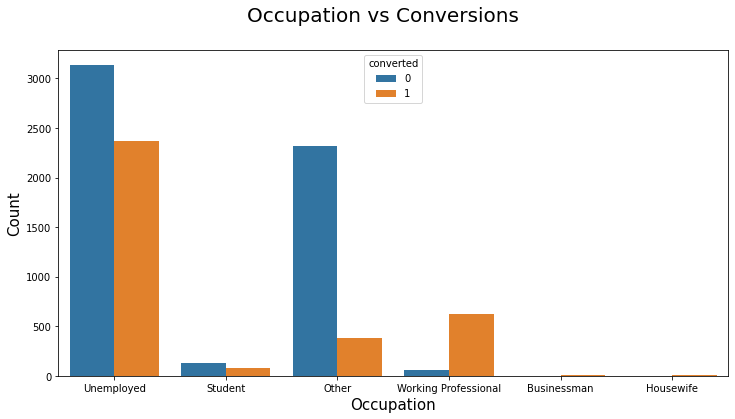

In [498]:
plt.figure(figsize=(12, 6))
sns.countplot(df_new['currOcc'], hue=df_new.converted)
plt.suptitle('Occupation vs Conversions', fontsize=20)
plt.xlabel('Occupation',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

Inference 
- "Unemployed" Leads are higher in number and conversion rate is also high among other, they have high chances of joining it.
- "Working professional" are more interested to join but the fewer number of leads, We need to try to get the more number of leads from "working Professional".

### What matters most to you in choosing a course

In [499]:
#Check null values
df_new['matterMost'].isnull().sum()

2702

In [500]:
#count unique values
df_new['matterMost'].value_counts()

Better Career Prospects      6399
Flexibility & Convenience       1
Other                           1
Name: matterMost, dtype: int64

In [501]:
#Impute the null to 'other'
df_new['matterMost'].fillna('Other', inplace=True)

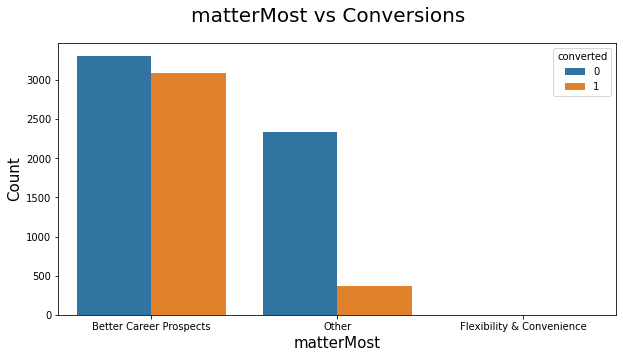

In [502]:
plt.figure(figsize=(10, 5))
sns.countplot(df_new['matterMost'], hue=df_new.converted)
plt.suptitle('matterMost vs Conversions', fontsize=20)
plt.xlabel('matterMost',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

Inference 
- Most of the leads have the same reason for choosing the course i.e. "Better Career Prospect" Nothing can be concluded from it.

### Search

In [503]:
#Check null values
df_new['search'].isnull().sum()

0

In [504]:
#count unique values
df_new['search'].value_counts()

No     9089
Yes      14
Name: search, dtype: int64

### Magazine

In [505]:
#Check null values
df_new['magazine'].isnull().sum()

0

In [506]:
#count unique values
df_new['magazine'].value_counts()

No    9103
Name: magazine, dtype: int64

### Newspaper Article

In [507]:
#Check null values
df_new['article'].isnull().sum()

0

In [508]:
#count unique values
df_new['article'].value_counts()

No     9101
Yes       2
Name: article, dtype: int64

### X Education Forums

In [509]:
#Check null values
df_new['forums'].isnull().sum()

0

In [510]:
#count unique values
df_new['forums'].value_counts()

No     9102
Yes       1
Name: forums, dtype: int64

### Newspaper

In [511]:
#Check null values
df_new['newspaper'].isnull().sum()

0

In [512]:
#count unique values
df_new['newspaper'].value_counts()

No     9102
Yes       1
Name: newspaper, dtype: int64

### Digital Advertisement

In [513]:
#Check null values
df_new['digitalAdvert'].isnull().sum()

0

In [514]:
#count unique values
df_new['digitalAdvert'].value_counts()

No     9099
Yes       4
Name: digitalAdvert, dtype: int64

### Through Recommendations

In [515]:
#Check null values
df_new['recommendation'].isnull().sum()

0

In [516]:
#count unique values
df_new['recommendation'].value_counts()

No     9096
Yes       7
Name: recommendation, dtype: int64

### Receive More Updates About Our Courses

In [517]:
#Check null values
df_new['receiveUpdates'].isnull().sum()

0

In [518]:
#count unique values
df_new['receiveUpdates'].value_counts()

No    9103
Name: receiveUpdates, dtype: int64

### Update me on Supply Chain Content

In [519]:
#Check null values
df_new['updateSCC'].isnull().sum()

0

In [520]:
#count unique values
df_new['updateSCC'].value_counts()

No    9103
Name: updateSCC, dtype: int64

### Get updates on DM Content

In [521]:
#Check null values
df_new['updateDM'].isnull().sum()

0

In [522]:
#count unique values
df_new['updateDM'].value_counts()

No    9103
Name: updateDM, dtype: int64

### I agree to pay the amount through cheque

In [523]:
#Check null values
df_new['cheque'].isnull().sum()

0

In [524]:
#count unique values
df_new['cheque'].value_counts()

No    9103
Name: cheque, dtype: int64

### A free copy of Mastering The Interview

In [525]:
#Check null values
df_new['masteringInterview'].isnull().sum()

0

In [526]:
#count unique values
df_new['masteringInterview'].value_counts()

No     6215
Yes    2888
Name: masteringInterview, dtype: int64

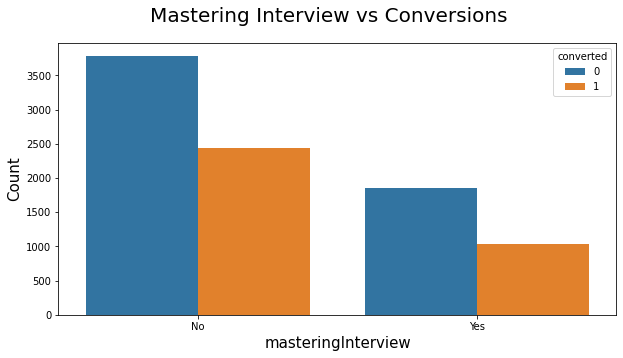

In [527]:
plt.figure(figsize=(10, 5))
sns.countplot(df_new['masteringInterview'], hue=df_new.converted)
plt.suptitle('Mastering Interview vs Conversions', fontsize=20)
plt.xlabel('masteringInterview',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

Inference

The following columns are highly imbalanced nothing can be drawn from them-
- Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque, A free copy of Mastering The Interview


### Tags

In [528]:
#Check null values
df_new['tags'].isnull().sum()

3333

In [529]:
#count unique values
df_new['tags'].value_counts()

Will revert after reading the email                  2035
Ringing                                              1189
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          173
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    26
in touch with EINS                                     12
Lost to Others

In [530]:
# Impute the nulls values to 'other'
df_new['tags'].fillna('Other', inplace=True)

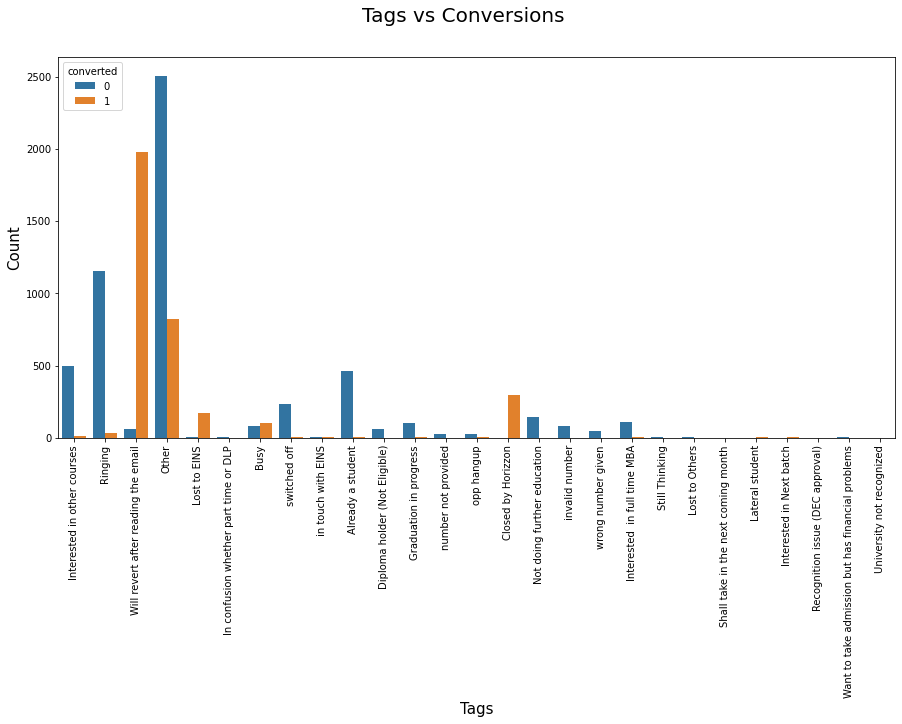

In [531]:
plt.figure(figsize=(15, 7))
sns.countplot(df_new['tags'], hue=df_new.converted)
plt.suptitle('Tags vs Conversions', fontsize=20)
plt.xlabel('Tags',fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('Count',fontsize=15)
plt.show()

Inference 
- "Will revert after reading the email" has a higher conversion rate we should more focus to increase the conversions.

### Lead Quality

In [532]:
#Check null values
df_new['leadQuality'].isnull().sum()

4729

In [533]:
#count unique values
df_new['leadQuality'].value_counts()

Might be             1533
Not Sure             1087
Worst                 601
High in Relevance     597
Low in Relevance      556
Name: leadQuality, dtype: int64

In [534]:
# Impute the nulls values to 'other'
df_new['leadQuality'].fillna('Other', inplace=True)

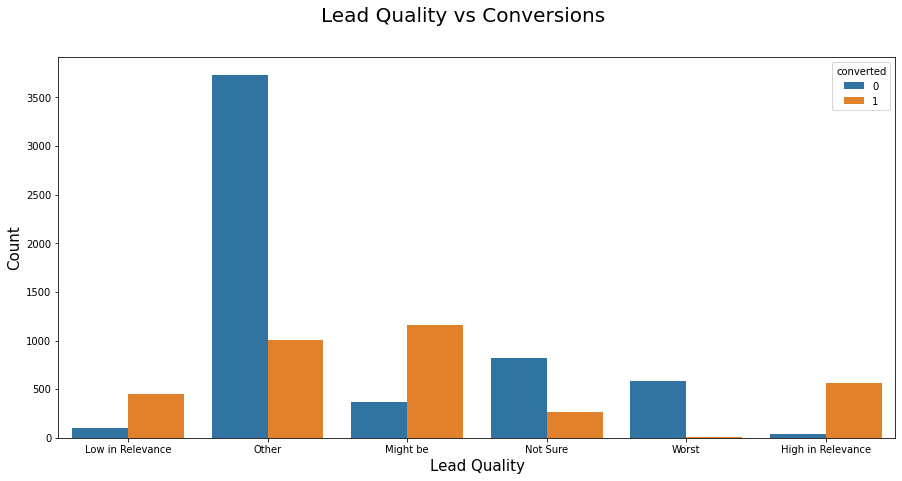

In [535]:
plt.figure(figsize=(15, 7))
sns.countplot(df_new['leadQuality'], hue=df_new.converted)
plt.suptitle('Lead Quality vs Conversions', fontsize=20)
plt.xlabel('Lead Quality',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

Inference 
- Three attributes "Might be", "High in Relevance" & "Low in Relevance" has a higher conversion rate we need to more focus on them

### Lead profile

In [536]:
#Check null values
df_new['leadProfile'].isnull().sum()

2702

In [537]:
#count unique values
df_new['leadProfile'].value_counts()

Select                         4079
Potential Lead                 1559
Other Leads                     482
Student of SomeSchool           240
Lateral Student                  21
Dual Specialization Student      20
Name: leadProfile, dtype: int64

In [538]:
# Impute the nulls values to 'other'
df_new['leadProfile'].fillna('Other Leads', inplace=True)

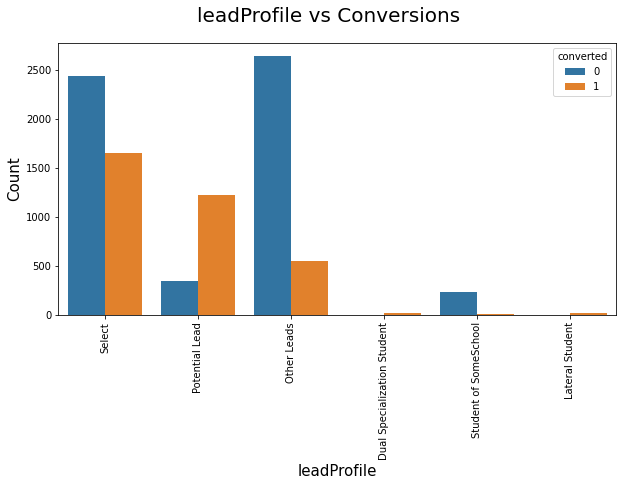

In [539]:
plt.figure(figsize=(10, 5))
sns.countplot(df_new['leadProfile'], hue=df_new.converted)
plt.suptitle('leadProfile vs Conversions', fontsize=20)
plt.xlabel('leadProfile',fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('Count',fontsize=15)
plt.show()

- Apart from the "Select", "potential Customer"  level has a high conversion rate, obvious, It doesn't make sense to include this attribute in analysis.

### City

In [540]:
#Check null values
df_new['city'].isnull().sum()

1419

In [541]:
#count unique values
df_new['city'].value_counts()

Mumbai                         3179
Select                         2181
Thane & Outskirts               746
Other Cities                    680
Other Cities of Maharashtra     447
Other Metro Cities              377
Tier II Cities                   74
Name: city, dtype: int64

'Select' is a default option which is equvalent to Null value so we can merge the Null values with Select.

In [542]:
# Impute the nulls values to 'select'
df_new['city'].fillna('Select', inplace=True)

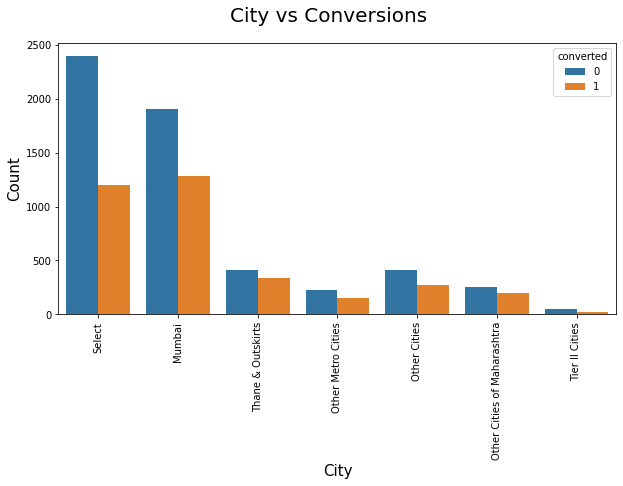

In [543]:
plt.figure(figsize=(10, 5))
sns.countplot(df_new['city'], hue=df_new.converted)
plt.suptitle('City vs Conversions', fontsize=20)
plt.xlabel('City',fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('Count',fontsize=15)
plt.show()

Observation
- Apart From Select, Mumbai has a higher number of leads and conversions.


### Last Notable Activity

In [544]:
df_new['lastNotableActivity'].isnull().sum()

0

In [545]:
df_new['lastNotableActivity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
View in browser link Clicked       1
Form Submitted on Website          1
Approached upfront                 1
Resubscribed to emails             1
Email Received                     1
Name: lastNotableActivity, dtype: int64

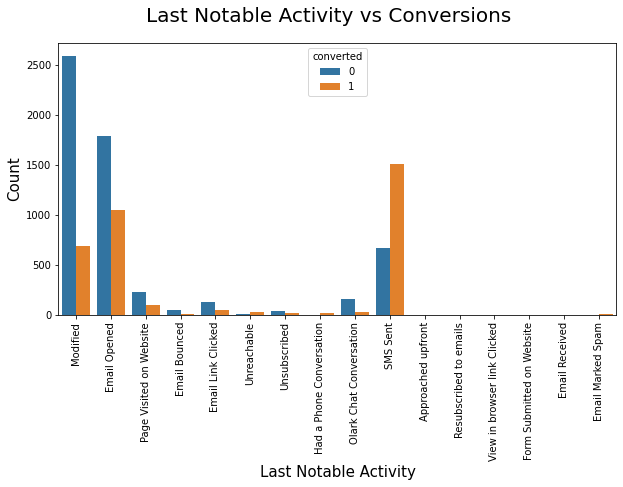

In [546]:
plt.figure(figsize=(10, 5))
sns.countplot(df_new['lastNotableActivity'], hue=df_new.converted)
plt.suptitle('Last Notable Activity vs Conversions', fontsize=20)
plt.xlabel('Last Notable Activity',fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('Count',fontsize=15)
plt.show()

Inference 
- As "Last Activity" column, We concluded the same for this column-From the above graph, we can see that the Last actives of the users "Email Opend" and "SMS sent" have a higher conversion rate.


- Asymmetrique Activity Index 
- Asymmetrique Profile Index     
- Asymmetrique Activity Score  
- Asymmetrique Profile Score  

These columns have 45% null values we are not considering them for analysis.
  

In [547]:
#let drop the Lead Number, 'AsyActivityScore, AsyProfileScore
df_new.drop(['leadNum','AsyActivityScore', 'AsyProfileScore'],axis=1,inplace=True)

### Numerical Variable Analysis

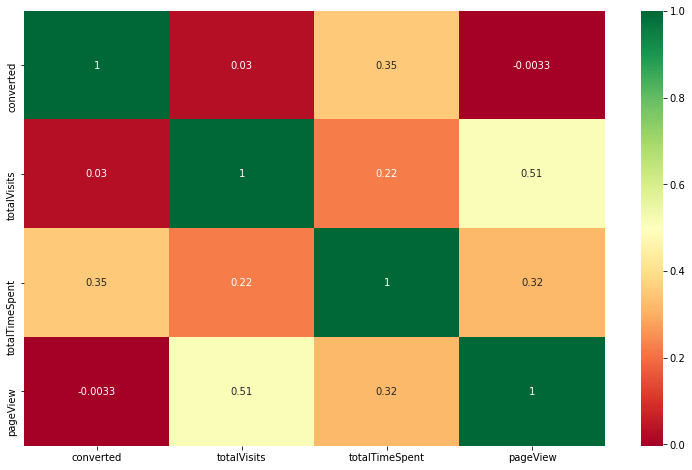

In [548]:
#let's check the correlation among variable
plt.figure(figsize = (13, 8))
sns.heatmap(df_new.corr(), annot = True, cmap="RdYlGn")
plt.show()

Observation
- It is observed that "totalvisit" and "pageView" are highly and have a correlation value of 0.51. 

### TotalVisits

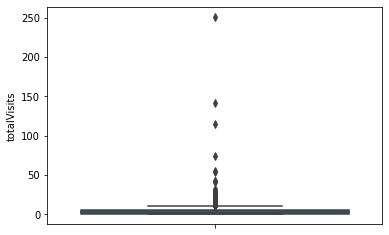

In [549]:
#visualizing spread of variable
plt.figure(figsize=(6,4))
sns.boxplot(y=df_new['totalVisits'])
plt.show()

There are some outliers here

In [550]:
#checking percentile values for "Total Visits"

df_new['totalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: totalVisits, dtype: float64

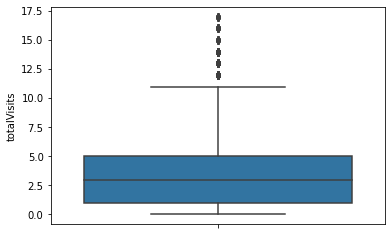

In [551]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = df_new.totalVisits.quantile(0.99)
df_new = df_new[(df_new.totalVisits <= Q3)]
Q1 = df_new.totalVisits.quantile(0.01)
df_new = df_new[(df_new.totalVisits >= Q1)]
sns.boxplot(y=df_new['totalVisits'])
plt.show()

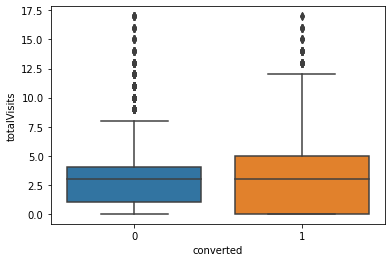

In [552]:
#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'totalVisits', x = 'converted', data = df_new)
plt.show()

Inference

we have observed that the Median of both converted and not converted leads are seemed equal, We couldn't conclude on the basis of "Total Visits".

### Page Views Per Visit

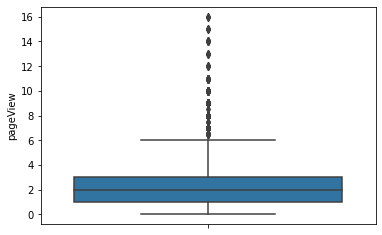

In [553]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=df_new['pageView'])
plt.show()

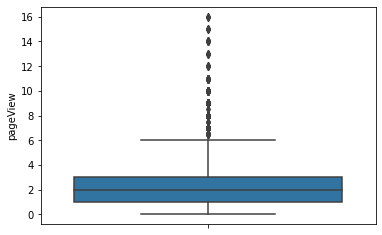

In [554]:
#Outlier Treatment: Remove top & bottom 1% 

Q3 = df_new['pageView'].quantile(0.99)
leads = df_new[df_new['pageView'] <= Q3]
Q1 = df_new['pageView'].quantile(0.01)
leads = df_new[df_new['pageView'] >= Q1]
sns.boxplot(y=df_new['pageView'])
plt.show()

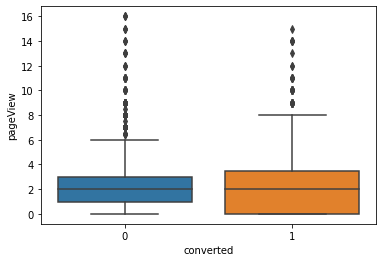

In [555]:
#checking Spread of "Page Views Per Visit" vs Converted variable

sns.boxplot(x=df_new.converted,y=df_new['pageView'])
plt.show()

Inference
- The median for converted and unconverted leads is the same.
- Nothing can be said specifically for lead conversion from Page Views Per Visit

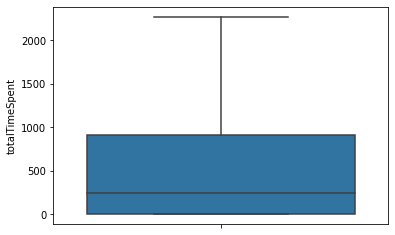

In [556]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['totalTimeSpent'])
plt.show()

No major outliers are there so no need for outliers treatment.

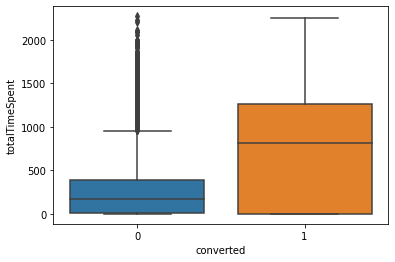

In [557]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=df_new.converted,y=df_new['totalTimeSpent'])
plt.show()

Inference
- From the above plot, it's clear that the person who spent more time on the website is more likely to convert.

# Data Preparation

In [558]:
df.head()

,propId,leadNum,leadOrgn,leadSrc,email,call,converted,totalVisits,totalTimeSpent,pageView,lastActivity,country,specialization,heardSource,currOcc,matterMost,search,magazine,article,forums,newspaper,digitalAdvert,recommendation,receiveUpdates,tags,leadQuality,updateSCC,updateDM,leadProfile,city,AsyActivityIdx,AsyProfileIdx,AsyActivityScore,AsyProfileScore,cheque,masteringInterview,lastNotableActivity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


##### leadOrgn

In [559]:
df.leadOrgn.value_counts()

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: leadOrgn, dtype: int64

In [560]:
df.leadOrgn.isna().sum()

0

In [561]:
# Binarizing it
leadOrgnBinarizer = LabelBinarizer()
leadOrgnBinarizer.fit(df.leadOrgn)
leadOrgnDf = pd.DataFrame(leadOrgnBinarizer.transform(df.leadOrgn), columns=leadOrgnBinarizer.classes_)
leadOrgnDf

,API,Landing Page Submission,Lead Add Form,Lead Import
0,1,0,0,0
1,1,0,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
9098,0,1,0,0
9099,0,1,0,0
9100,0,1,0,0
9101,0,1,0,0


In [562]:
leadOrgnEncoder = LabelEncoder()
df['leadOrgnEncoded'] = leadOrgnEncoder.fit_transform(df.leadOrgn)
df.head()

,propId,leadNum,leadOrgn,leadSrc,email,call,converted,totalVisits,totalTimeSpent,pageView,lastActivity,country,specialization,heardSource,currOcc,matterMost,search,magazine,article,forums,newspaper,digitalAdvert,recommendation,receiveUpdates,tags,leadQuality,updateSCC,updateDM,leadProfile,city,AsyActivityIdx,AsyProfileIdx,AsyActivityScore,AsyProfileScore,cheque,masteringInterview,lastNotableActivity,leadOrgnEncoded
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified,1
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified,1


##### leadSrc

In [563]:
df.leadSrc.value_counts()

Google               2897
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
NC_EDM                  1
blog                    1
Pay per Click Ads       1
testone                 1
welearnblog_Home        1
WeLearn                 1
Name: leadSrc, dtype: int64

In [564]:
df.leadSrc.isna().sum()

0

In [565]:
df.leadSrc.fillna('Google', inplace=True)

In [566]:
# Binarizer
leadSrcBinarizer  = LabelBinarizer()
leadSrcBinarizer.fit(df.leadSrc)
leadSrcDf = pd.DataFrame(leadSrcBinarizer.transform(df.leadSrc), columns=leadSrcBinarizer.classes_)
leadSrcDf.head()

,Click2call,Direct Traffic,Facebook,Google,Live Chat,NC_EDM,Olark Chat,Organic Search,Pay per Click Ads,Press_Release,Reference,Referral Sites,Social Media,WeLearn,Welingak Website,bing,blog,google,testone,welearnblog_Home,youtubechannel
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [567]:
# encoding
leadSrcEncoder = LabelEncoder()
df['leadSrcEncoded'] = leadSrcEncoder.fit_transform(df.leadSrc)
df.head()

,propId,leadNum,leadOrgn,leadSrc,email,call,converted,totalVisits,totalTimeSpent,pageView,lastActivity,country,specialization,heardSource,currOcc,matterMost,search,magazine,article,forums,newspaper,digitalAdvert,recommendation,receiveUpdates,tags,leadQuality,updateSCC,updateDM,leadProfile,city,AsyActivityIdx,AsyProfileIdx,AsyActivityScore,AsyProfileScore,cheque,masteringInterview,lastNotableActivity,leadOrgnEncoded,leadSrcEncoded
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified,0,6
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened,0,7
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened,1,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified,1,1
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified,1,3


##### email

In [568]:
# Binarizing email column
df['email'] = df.email.map({'Yes':1, 'No':0})
df.email.value_counts()

0    8379
1     724
Name: email, dtype: int64

##### call

In [569]:
# Binarizing call column
df['call'] = df.call.map({'Yes':1, 'No':0})
df.call.value_counts()

0    9101
1       2
Name: call, dtype: int64

##### totalVisits

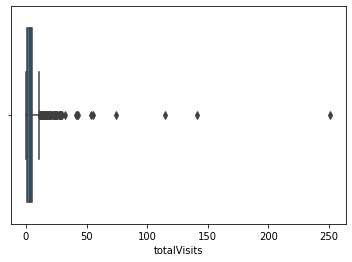

In [570]:
# checking for outliers for totalVisits
sns.boxplot(df.totalVisits)
plt.show()
#Above 50 visits are rare and outliers

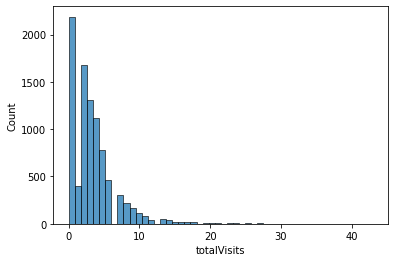

In [571]:
# check for distribution of data
sns.histplot(df[df.totalVisits < 50].totalVisits, bins = 50)
plt.show()

In [572]:
# remove na for total visits
df = df[~df.totalVisits.isna()]
df.totalVisits.isna().sum()

0

In [573]:
# Bucketing the value
df['totalVisitsBucketed']= df.totalVisits.apply(lambda x : 0 if x == 0 else (x // 5) + 1 ).astype('int')
df.totalVisitsBucketed

0       0
1       2
2       1
3       1
4       1
       ..
9235    2
9236    1
9237    1
9238    1
9239    2
Name: totalVisitsBucketed, Length: 9103, dtype: int64

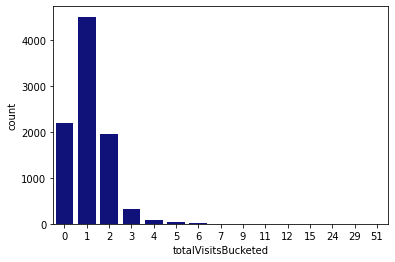

In [574]:
# distribution of totalVisitsBucketed
sns.countplot(df.totalVisitsBucketed, color='darkblue')
plt.show()

##### totalTimeSpent

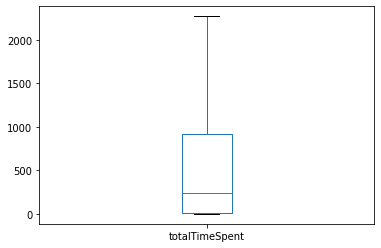

In [575]:
# check for outliers in totalTimeSpent
df.totalTimeSpent.plot(kind='box')
plt.show()

#no outliers found

In [576]:
df.totalTimeSpent.isna().sum()

0

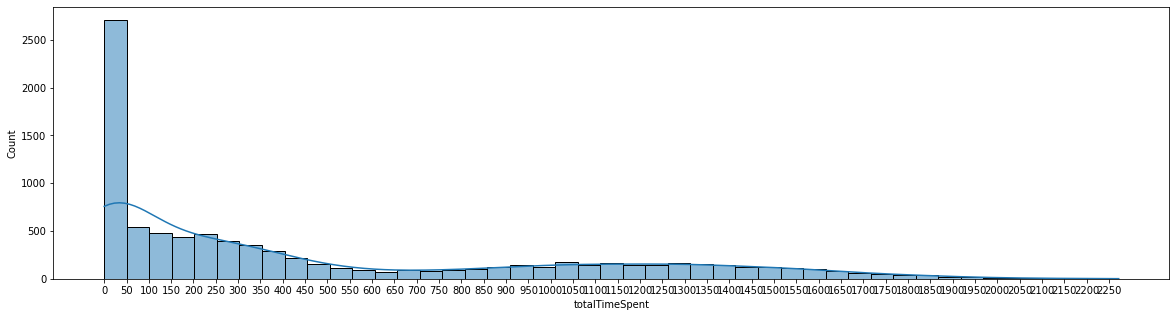

In [577]:
# distribution of totalTimeSpent
fig = plt.figure(figsize=[20, 5])
sns.histplot(df.totalTimeSpent,bins= max(df.totalTimeSpent)//50, kde=True)
plt.xticks(range(0, max(df.totalTimeSpent), 50))
plt.show()

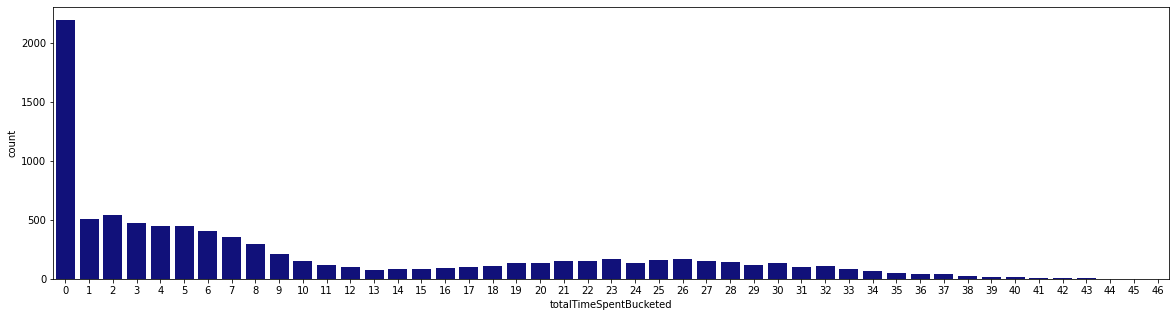

In [578]:
# Bucketing total time spent and plotting it.
df['totalTimeSpentBucketed'] = df.totalTimeSpent.apply(lambda x: 0 if x == 0 else (x//50) + 1).astype('int')

fig = plt.figure(figsize=[20,5])
sns.countplot(df.totalTimeSpentBucketed, color='darkblue')
plt.show()

##### pageView

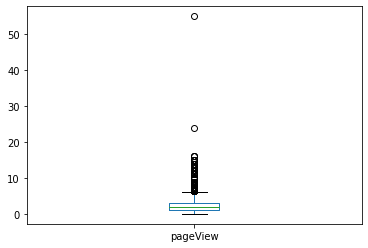

In [579]:
# check outlier in pageView
df.pageView.plot(kind='box')
plt.show()

# There are outliers but they are continuous. seems genuine 

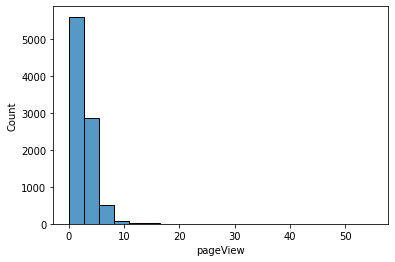

In [580]:
# distribution of page view
sns.histplot(df.pageView, bins=20)
plt.show()

In [581]:
df.pageView.isna().sum()

0

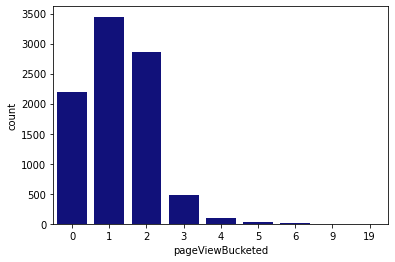

In [582]:
# bucketing and ploting count of page view
df['pageViewBucketed']= df.pageView.apply(lambda x: 0 if x == 0 else (x//3) + 1).astype('int')

sns.countplot(df.pageViewBucketed, color='darkblue')
plt.show()

##### lastActivity

In [583]:
# unique count of each element
df.lastActivity.value_counts()

Email Opened                    3437
SMS Sent                        2738
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      61
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: lastActivity, dtype: int64

In [584]:
# check null
df.lastActivity.isna().sum()

0

In [585]:
# label binarizer
lastActBinarizer = LabelBinarizer()
lastActBinarizer.fit(df.lastActivity)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [586]:
lastActivityDf = pd.DataFrame(lastActBinarizer.transform(df.lastActivity), columns=lastActBinarizer.classes_)
lastActivityDf.head()

,Approached upfront,Converted to Lead,Email Bounced,Email Link Clicked,Email Marked Spam,Email Opened,Email Received,Form Submitted on Website,Had a Phone Conversation,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked,Visited Booth in Tradeshow
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [587]:
lastActEncoder = LabelEncoder()
lastActEncoder.fit(df.lastActivity)

LabelEncoder()

In [588]:
df['lastActivityEncoded'] = lastActEncoder.transform(df.lastActivity)
df.lastActivityEncoded

0       10
1        5
2        5
3       13
4        1
        ..
9235     4
9236    12
9237    12
9238    12
9239    12
Name: lastActivityEncoded, Length: 9103, dtype: int64

##### country

In [589]:
# count of unique country
df.country.value_counts()

# value - 'unknown' present

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Nigeria                    4
Kuwait                     4
Canada                     4
Germany                    4
South Africa               4
Sweden                     3
Philippines                2
Ghana                      2
China                      2
Uganda                     2
Netherlands                2
Bangladesh                 2
Italy                      2
Asia/Pacific Region        2
Belgium                    2
Sri Lanka                  1
Vietnam                    1
Tanzania                   1
Switzerland                1
Kenya                      1
Indonesia                  1
Russia        

In [590]:
# check for null
df.country.isna().sum()

# large no of rows has missing country

2324

In [591]:
# imputing na with 'Unknown'
df.country.fillna('unknown', inplace=True)

In [592]:
# binarizing country
countryBinarizer = LabelBinarizer()
countryBinarizer.fit(df.country)
countryDf = pd.DataFrame(countryBinarizer.transform(df.country), columns=countryBinarizer.classes_)
countryDf.head()

,Asia/Pacific Region,Australia,Bahrain,Bangladesh,Belgium,Canada,China,Denmark,France,Germany,Ghana,Hong Kong,India,Indonesia,Italy,Kenya,Kuwait,Liberia,Malaysia,Netherlands,Nigeria,Oman,Philippines,Qatar,Russia,Saudi Arabia,Singapore,South Africa,Sri Lanka,Sweden,Switzerland,Tanzania,Uganda,United Arab Emirates,United Kingdom,United States,Vietnam,unknown
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [593]:
# encoding country
# binarizing country
countryEncoder = LabelEncoder()
df['countryEncoded'] = countryEncoder.fit_transform(df.country)
df.countryEncoded

0       37
1       12
2       12
3       12
4       12
        ..
9235    25
9236    12
9237    12
9238    12
9239     3
Name: countryEncoded, Length: 9103, dtype: int64

##### specialization

In [594]:
# count of unique values

df.specialization.value_counts()

# value - 'Select' is present which is equivalent to NA

Select                               1873
Finance Management                    962
Human Resource Management             838
Marketing Management                  824
Operations Management                 500
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 157
Hospitality Management                111
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: specialization, dtype: int64

In [595]:
# check null
df.specialization.isna().sum()

1431

In [596]:
# impute NA with 'Select'
df.specialization.fillna('Select', inplace=True)

In [597]:
specBinarizer = LabelBinarizer()
specBinarizer.fit(df.specialization)
specializationDf = pd.DataFrame( specBinarizer.transform(df.specialization), columns=specBinarizer.classes_ )
specializationDf.head()

,"Banking, Investment And Insurance",Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Select,Services Excellence,Supply Chain Management,Travel and Tourism
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [598]:
specEncoder = LabelEncoder()
df['specializationEncoded'] = specEncoder.fit_transform(df.specialization)
df.specializationEncoded

0       15
1       15
2        1
3       11
4       15
        ..
9235     8
9236    11
9237     1
9238     7
9239    17
Name: specializationEncoded, Length: 9103, dtype: int64

##### heardSource

In [599]:
# unique count of element
df.heardSource.value_counts()

# value - 'Select' is present

Select                   4914
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               66
Email                      26
SMS                        23
Name: heardSource, dtype: int64

In [600]:
# check for null
df.heardSource.isnull().sum()

2200

In [601]:
# impute null with 'Select'
df.heardSource.fillna('Select', inplace=True)

In [602]:
heardSourceBinarizer = LabelBinarizer()
heardSourceBinarizer.fit(df.heardSource)
heardSourceDf = pd.DataFrame( heardSourceBinarizer.transform(df.heardSource), columns=heardSourceBinarizer.classes_ )
heardSourceDf.head()

,Advertisements,Email,Multiple Sources,Online Search,Other,SMS,Select,Social Media,Student of SomeSchool,Word Of Mouth
0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0


In [603]:
heardSourceEncoder = LabelEncoder()
df['heardSourceEncoded'] = heardSourceEncoder.fit_transform(df.heardSource)
df.heardSourceEncoded

0       6
1       6
2       6
3       9
4       4
       ..
9235    6
9236    6
9237    6
9238    3
9239    6
Name: heardSourceEncoded, Length: 9103, dtype: int64

##### currOcc

In [604]:
# count of each element
df.currOcc.value_counts()

Unemployed              5502
Working Professional     679
Student                  207
Other                     15
Housewife                  9
Businessman                8
Name: currOcc, dtype: int64

In [605]:
# check for null
df.currOcc.isna().sum()

2683

In [606]:
# impute null
df.currOcc.fillna('Other', inplace=True)

In [607]:
currOccBinarizer = LabelBinarizer()
currOccBinarizer.fit(df.currOcc)
currOccDf = pd.DataFrame(currOccBinarizer.transform(df.currOcc), columns=currOccBinarizer.classes_)
currOccDf.head()

,Businessman,Housewife,Other,Student,Unemployed,Working Professional
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,1,0,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0


In [608]:
currOccEncoder = LabelEncoder()
df['currOccEncoded'] = currOccEncoder.fit_transform(df.currOcc)
df.head()

,propId,leadNum,leadOrgn,leadSrc,email,call,converted,totalVisits,totalTimeSpent,pageView,lastActivity,country,specialization,heardSource,currOcc,matterMost,search,magazine,article,forums,newspaper,digitalAdvert,recommendation,receiveUpdates,tags,leadQuality,updateSCC,updateDM,leadProfile,city,AsyActivityIdx,AsyProfileIdx,AsyActivityScore,AsyProfileScore,cheque,masteringInterview,lastNotableActivity,leadOrgnEncoded,leadSrcEncoded,totalVisitsBucketed,totalTimeSpentBucketed,pageViewBucketed,lastActivityEncoded,countryEncoded,specializationEncoded,heardSourceEncoded,currOccEncoded
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,unknown,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified,0,6,0,0,0,10,37,15,6,4
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened,0,7,2,14,1,5,12,15,6,4
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened,1,1,1,31,1,5,12,1,6,3
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified,1,1,1,7,1,13,12,11,9,4
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified,1,3,1,29,1,1,12,15,4,4


##### matterMost

In [609]:
# count of each element
df.matterMost.value_counts()

Better Career Prospects      6399
Flexibility & Convenience       1
Other                           1
Name: matterMost, dtype: int64

In [610]:
# check null
df.matterMost.isna().sum()

2702

In [611]:
# impute null
df.matterMost.fillna('Other', inplace=True)

In [612]:
# Binarizing
matterMostBinarizer = LabelBinarizer()
matterMostBinarizer.fit(df.matterMost)
matterMostDf = pd.DataFrame(matterMostBinarizer.transform(df.matterMost), columns=matterMostBinarizer.classes_)
matterMostDf.head()

,Better Career Prospects,Flexibility & Convenience,Other
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [613]:
matterMostEncoder = LabelEncoder()
df['matterMostEncoded'] = matterMostEncoder.fit_transform(df.matterMost)
df.head()

,propId,leadNum,leadOrgn,leadSrc,email,call,converted,totalVisits,totalTimeSpent,pageView,lastActivity,country,specialization,heardSource,currOcc,matterMost,search,magazine,article,forums,newspaper,digitalAdvert,recommendation,receiveUpdates,tags,leadQuality,updateSCC,updateDM,leadProfile,city,AsyActivityIdx,AsyProfileIdx,AsyActivityScore,AsyProfileScore,cheque,masteringInterview,lastNotableActivity,leadOrgnEncoded,leadSrcEncoded,totalVisitsBucketed,totalTimeSpentBucketed,pageViewBucketed,lastActivityEncoded,countryEncoded,specializationEncoded,heardSourceEncoded,currOccEncoded,matterMostEncoded
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,unknown,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified,0,6,0,0,0,10,37,15,6,4,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened,0,7,2,14,1,5,12,15,6,4,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened,1,1,1,31,1,5,12,1,6,3,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified,1,1,1,7,1,13,12,11,9,4,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified,1,3,1,29,1,1,12,15,4,4,0


##### search, magazine, article, forums, newspaper, digitalAdvert, recommendation, receiveUpdates, updateSCC, updateDM, cheque, masteringInterview

In [614]:
cols = ['search', 'magazine', 'article', 'forums', 'newspaper', 'digitalAdvert', 'recommendation', 'receiveUpdates', 'updateSCC', 'updateDM',
'cheque',	'masteringInterview']
df[cols] = df[cols].applymap(lambda x: 1 if x == 'Yes' else 0).astype('int')
df[cols].sum()


search                  14
magazine                 0
article                  2
forums                   1
newspaper                1
digitalAdvert            4
recommendation           7
receiveUpdates           0
updateSCC                0
updateDM                 0
cheque                   0
masteringInterview    2888
dtype: int64

In [615]:
df.head()

,propId,leadNum,leadOrgn,leadSrc,email,call,converted,totalVisits,totalTimeSpent,pageView,lastActivity,country,specialization,heardSource,currOcc,matterMost,search,magazine,article,forums,newspaper,digitalAdvert,recommendation,receiveUpdates,tags,leadQuality,updateSCC,updateDM,leadProfile,city,AsyActivityIdx,AsyProfileIdx,AsyActivityScore,AsyProfileScore,cheque,masteringInterview,lastNotableActivity,leadOrgnEncoded,leadSrcEncoded,totalVisitsBucketed,totalTimeSpentBucketed,pageViewBucketed,lastActivityEncoded,countryEncoded,specializationEncoded,heardSourceEncoded,currOccEncoded,matterMostEncoded
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,unknown,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified,0,6,0,0,0,10,37,15,6,4,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened,0,7,2,14,1,5,12,15,6,4,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened,1,1,1,31,1,5,12,1,6,3,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified,1,1,1,7,1,13,12,11,9,4,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified,1,3,1,29,1,1,12,15,4,4,0


##### tags

In [616]:
df.tags.value_counts()

Will revert after reading the email                  2035
Ringing                                              1189
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          173
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    26
in touch with EINS                                     12
Lost to Others

In [617]:
df.tags.isnull().sum()

3333

In [618]:
# replace null with 'Others' as non of present elements are close to null
df.tags.fillna('Others', inplace=True)

In [619]:
# Binarizing it
tagsBinarizer = LabelBinarizer()
tagsBinarizer.fit(df.tags)
tagsDf = pd.DataFrame(tagsBinarizer.transform(df.tags), columns=tagsBinarizer.classes_)
tagsDf.head()

,Already a student,Busy,Closed by Horizzon,Diploma holder (Not Eligible),Graduation in progress,In confusion whether part time or DLP,Interested in full time MBA,Interested in Next batch,Interested in other courses,Lateral student,Lost to EINS,Lost to Others,Not doing further education,Others,Recognition issue (DEC approval),Ringing,Shall take in the next coming month,Still Thinking,University not recognized,Want to take admission but has financial problems,Will revert after reading the email,in touch with EINS,invalid number,number not provided,opp hangup,switched off,wrong number given
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [620]:
# encoding it
tagsEncoder = LabelEncoder()
df['tagsEncoded'] = tagsEncoder.fit_transform(df.tags)
df.head()

,propId,leadNum,leadOrgn,leadSrc,email,call,converted,totalVisits,totalTimeSpent,pageView,lastActivity,country,specialization,heardSource,currOcc,matterMost,search,magazine,article,forums,newspaper,digitalAdvert,recommendation,receiveUpdates,tags,leadQuality,updateSCC,updateDM,leadProfile,city,AsyActivityIdx,AsyProfileIdx,AsyActivityScore,AsyProfileScore,cheque,masteringInterview,lastNotableActivity,leadOrgnEncoded,leadSrcEncoded,totalVisitsBucketed,totalTimeSpentBucketed,pageViewBucketed,lastActivityEncoded,countryEncoded,specializationEncoded,heardSourceEncoded,currOccEncoded,matterMostEncoded,tagsEncoded
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,unknown,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified,0,6,0,0,0,10,37,15,6,4,0,8
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened,0,7,2,14,1,5,12,15,6,4,0,15
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened,1,1,1,31,1,5,12,1,6,3,0,20
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified,1,1,1,7,1,13,12,11,9,4,0,15
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified,1,3,1,29,1,1,12,15,4,4,0,20


##### leadQuality

In [621]:
# check if relation between tags and leadQuality
df[['tags', 'leadQuality']]

,tags,leadQuality
0,Interested in other courses,Low in Relevance
1,Ringing,NaN
2,Will revert after reading the email,Might be
3,Ringing,Not Sure
4,Will revert after reading the email,Might be
...,...,...
9235,Will revert after reading the email,High in Relevance
9236,wrong number given,Might be
9237,invalid number,Not Sure
9238,Others,NaN


In [622]:
df.leadQuality.value_counts()

Might be             1533
Not Sure             1087
Worst                 601
High in Relevance     597
Low in Relevance      556
Name: leadQuality, dtype: int64

In [623]:
df.leadQuality.isna().sum()

4729

- Can be dropped as it has 50% missing value. 
- Also, tags gives some what similar information

##### leadProfile

In [624]:
df.leadProfile.value_counts()

Select                         4079
Potential Lead                 1559
Other Leads                     482
Student of SomeSchool           240
Lateral Student                  21
Dual Specialization Student      20
Name: leadProfile, dtype: int64

In [625]:
df.leadProfile.isna().sum()

2702

In [626]:
df.leadProfile.fillna('NA', inplace=True)

In [627]:
pd.pivot_table(df, index='leadProfile', columns='tags', aggfunc='count', fill_value=0)['propId']

tags,Already a student,Busy,Closed by Horizzon,Diploma holder (Not Eligible),Graduation in progress,In confusion whether part time or DLP,Interested in full time MBA,Interested in Next batch,Interested in other courses,Lateral student,Lost to EINS,Lost to Others,Not doing further education,Others,Recognition issue (DEC approval),Ringing,Shall take in the next coming month,Still Thinking,University not recognized,Want to take admission but has financial problems,Will revert after reading the email,in touch with EINS,invalid number,number not provided,opp hangup,switched off,wrong number given
leadProfile,,,,,,,,,,,,,,,,,,,,,,,,,,,
Dual Specialization Student,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,0,0
Lateral Student,1,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,0
NA,0,0,0,0,0,0,0,0,32,0,49,0,0,2621,0,0,0,0,0,0,0,0,0,0,0,0,0
Other Leads,2,23,20,14,30,1,36,0,82,0,4,5,48,2,0,42,0,0,0,2,129,2,5,2,8,21,4
Potential Lead,50,20,151,6,18,1,13,4,66,1,37,0,19,16,1,111,1,3,0,3,1002,2,6,1,3,17,7
Select,185,142,119,43,63,3,64,1,329,2,79,2,78,694,0,1036,1,3,2,1,870,8,71,23,22,202,36
Student of SomeSchool,227,0,2,0,0,0,3,0,0,0,4,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0


- Most rows with missing leadProfile has missing tags also

##### lastNotableActivity

In [628]:
df.lastNotableActivity.value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
View in browser link Clicked       1
Form Submitted on Website          1
Approached upfront                 1
Resubscribed to emails             1
Email Received                     1
Name: lastNotableActivity, dtype: int64

In [629]:
df.lastNotableActivity.isna().sum()

0

In [630]:
# Binarizing it
lastNotableActivityBinarizer = LabelBinarizer()
lastNotableActivityBinarizer.fit(df.lastNotableActivity)
lastNotableActivityDf = pd.DataFrame( lastNotableActivityBinarizer.transform(df.lastNotableActivity), columns=lastNotableActivityBinarizer.classes_)
lastNotableActivityDf.head()

,Approached upfront,Email Bounced,Email Link Clicked,Email Marked Spam,Email Opened,Email Received,Form Submitted on Website,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [631]:
lastNotableActivityEncoder = LabelEncoder()
df['lastNotableActivityEncoded'] = lastNotableActivityEncoder.fit_transform(df.lastNotableActivity)
df.head()

,propId,leadNum,leadOrgn,leadSrc,email,call,converted,totalVisits,totalTimeSpent,pageView,lastActivity,country,specialization,heardSource,currOcc,matterMost,search,magazine,article,forums,newspaper,digitalAdvert,recommendation,receiveUpdates,tags,leadQuality,updateSCC,updateDM,leadProfile,city,AsyActivityIdx,AsyProfileIdx,AsyActivityScore,AsyProfileScore,cheque,masteringInterview,lastNotableActivity,leadOrgnEncoded,leadSrcEncoded,totalVisitsBucketed,totalTimeSpentBucketed,pageViewBucketed,lastActivityEncoded,countryEncoded,specializationEncoded,heardSourceEncoded,currOccEncoded,matterMostEncoded,tagsEncoded,lastNotableActivityEncoded
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,unknown,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified,0,6,0,0,0,10,37,15,6,4,0,8,8
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened,0,7,2,14,1,5,12,15,6,4,0,15,4
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened,1,1,1,31,1,5,12,1,6,3,0,20,4
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified,1,1,1,7,1,13,12,11,9,4,0,15,8
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified,1,3,1,29,1,1,12,15,4,4,0,20,8


In [632]:
df.columns

Index(['propId', 'leadNum', 'leadOrgn', 'leadSrc', 'email', 'call',
       'converted', 'totalVisits', 'totalTimeSpent', 'pageView',
       'lastActivity', 'country', 'specialization', 'heardSource', 'currOcc',
       'matterMost', 'search', 'magazine', 'article', 'forums', 'newspaper',
       'digitalAdvert', 'recommendation', 'receiveUpdates', 'tags',
       'leadQuality', 'updateSCC', 'updateDM', 'leadProfile', 'city',
       'AsyActivityIdx', 'AsyProfileIdx', 'AsyActivityScore',
       'AsyProfileScore', 'cheque', 'masteringInterview',
       'lastNotableActivity', 'leadOrgnEncoded', 'leadSrcEncoded',
       'totalVisitsBucketed', 'totalTimeSpentBucketed', 'pageViewBucketed',
       'lastActivityEncoded', 'countryEncoded', 'specializationEncoded',
       'heardSourceEncoded', 'currOccEncoded', 'matterMostEncoded',
       'tagsEncoded', 'lastNotableActivityEncoded'],
      dtype='object')

# Segregate columns on basis of collection source

In [633]:
df.columns

Index(['propId', 'leadNum', 'leadOrgn', 'leadSrc', 'email', 'call',
       'converted', 'totalVisits', 'totalTimeSpent', 'pageView',
       'lastActivity', 'country', 'specialization', 'heardSource', 'currOcc',
       'matterMost', 'search', 'magazine', 'article', 'forums', 'newspaper',
       'digitalAdvert', 'recommendation', 'receiveUpdates', 'tags',
       'leadQuality', 'updateSCC', 'updateDM', 'leadProfile', 'city',
       'AsyActivityIdx', 'AsyProfileIdx', 'AsyActivityScore',
       'AsyProfileScore', 'cheque', 'masteringInterview',
       'lastNotableActivity', 'leadOrgnEncoded', 'leadSrcEncoded',
       'totalVisitsBucketed', 'totalTimeSpentBucketed', 'pageViewBucketed',
       'lastActivityEncoded', 'countryEncoded', 'specializationEncoded',
       'heardSourceEncoded', 'currOccEncoded', 'matterMostEncoded',
       'tagsEncoded', 'lastNotableActivityEncoded'],
      dtype='object')

In [634]:
web_collected = ['index', 'propId', 'leadNum', 'leadOrgn', 'leadSrc', 'email', 'call',
                 'totalVisits', 'totalTimeSpent', 'pageView', 'country','city','specialization', 'heardSource', 'currOcc',
                 'matterMost','search', 'magazine', 'article', 'forums', 'newspaper','digitalAdvert', 'recommendation', 'receiveUpdates', 
                 'leadOrgnEncoded', 'leadSrcEncoded', 'totalVisitsBucketed', 'totalTimeSpentBucketed', 'pageViewBucketed', 
                 'countryEncoded', 'specializationEncoded','heardSourceEncoded', 'currOccEncoded', 'matterMostEncoded', 'updateSCC', 'updateDM',
                 'masteringInterview']

sales = ['tags', 'leadQuality',  'leadProfile', 'AsyActivityIdx', 'AsyProfileIdx', 'AsyActivityScore', 'lastActivity', 'lastActivityEncoded'
         'AsyProfileScore', 'cheque', 'lastNotableActivity', 'tagsEncoded', 'lastNotableActivityEncoded']

##### pick column

In [635]:
required_col = [ 'email', 'call', 'search', 'magazine', 'article', 'forums', 
                'newspaper','digitalAdvert', 'recommendation', 'receiveUpdates',
                'updateSCC', 'updateDM', 'masteringInterview',
                'leadOrgnEncoded', 'leadSrcEncoded','totalVisitsBucketed', 
                'totalTimeSpentBucketed', 'pageViewBucketed', 
                'specializationEncoded', 'matterMostEncoded',]
              
# removed after VIF -> 'currOccEncoded', , 'heardSourceEncoded', 'countryEncoded'


In [636]:
df = df.reset_index()

In [637]:
df.isna().sum()

index                            0
propId                           0
leadNum                          0
leadOrgn                         0
leadSrc                          0
email                            0
call                             0
converted                        0
totalVisits                      0
totalTimeSpent                   0
pageView                         0
lastActivity                     0
country                          0
specialization                   0
heardSource                      0
currOcc                          0
matterMost                       0
search                           0
magazine                         0
article                          0
forums                           0
newspaper                        0
digitalAdvert                    0
recommendation                   0
receiveUpdates                   0
tags                             0
leadQuality                   4729
updateSCC                        0
updateDM            

# Train Test Split

In [638]:
X = df[required_col]
y = df.converted

In [639]:
from sklearn.model_selection import train_test_split

In [640]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [641]:
train_idx = X_train.index
test_idx = X_test.index

# Use stats model
    - to find the relevance of each predectors variable.

In [642]:
import statsmodels.api as sm

In [643]:
X_train_sm = X_train[required_col]
X_train_sm = sm.add_constant(X_train_sm)
sm_logreg= sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = sm_logreg.fit()

In [644]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 7282
Model:                            GLM   Df Residuals:                     7266
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3604.6
Date:                Sun, 16 May 2021   Deviance:                       7209.3
Time:                        22:01:00   Pearson chi2:                 7.38e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.2997      0.118    -11.017      0.000      -1.531      -1.068
email                     -1.1992      0.133     -9.026      0.000      -1.460      -0.939
call                      21.3211   3.37e+04      0.001      0.999   -6.61e+04    6.62e+04
search                    -0.2284      0.740     -0.309      0.758      -1.679       1.222
magazine               -1.905e-09   1.81e-06     -0.001      0.999   -3.55e-06    3.54e-06
article                   22.1324   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
forums                   -65.2613   7.15e+04     -0.001      0.999    -1.4e+05     1.4e+05
newspaper               1.111e-09   2.39e-06      0.000      1.000   -4.69e-06    4.69e-06
digitalAdvert             -0.2469      1.561     -0.158      0.874      -3.307       2.813
recommendation            22.3105   2.15e+04      0.001      0.999   -4.22e+04    4.22e+04
receiveUpdates         -9.038e-11   1.23e-07     -0.001      0.999    -2.4e-07     2.4e-07
updateSCC               1.639e-10   2.54e-07      0.001      0.999   -4.98e-07    4.98e-07
updateDM               -1.925e-16   1.07e-11   -1.8e-05      1.000    -2.1e-11     2.1e-11
masteringInterview        -0.4318      0.071     -6.059      0.000      -0.571      -0.292
leadOrgnEncoded            0.6380      0.055     11.671      0.000       0.531       0.745
leadSrcEncoded             0.1662      0.011     14.755      0.000       0.144       0.188
totalVisitsBucketed        0.0291      0.029      0.996      0.319      -0.028       0.086
totalTimeSpentBucketed     0.0954      0.003     30.854      0.000       0.089       0.102
pageViewBucketed          -0.4449      0.041    -10.924      0.000      -0.525      -0.365
specializationEncoded     -0.0234      0.007     -3.596      0.000      -0.036      -0.011
matterMostEncoded         -0.7757      0.038    -20.522      0.000      -0.850      -0.702
==========================================================================================
"""

- Some important predictors are
    - const, email, leadOrgn,
    - leadSrc, totalTimeSpent,
    - pageView, lastActivity,
    - specilization, matterMost

# Checking VIF

In [645]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [646]:
vif = pd.DataFrame()
vif['Features'] = required_col
vif['VIF'] = [variance_inflation_factor(X_train[required_col].values, i) for i in range(X_train[required_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,pageViewBucketed,4.13
18,specializationEncoded,3.82
14,leadSrcEncoded,3.29
15,totalVisitsBucketed,2.89
5,forums,2.70
13,leadOrgnEncoded,2.54
16,totalTimeSpentBucketed,2.17
4,article,2.00
12,masteringInterview,1.90
19,matterMostEncoded,1.46


# Feature Selection

In [647]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [648]:
log_reg = LogisticRegression()
rfe = RFE(log_reg,n_features_to_select=10)
rfe.fit(X_train[required_col], y_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=10, step=1, verbose=0)

In [649]:
rfe_list = list(zip(required_col, rfe.support_, rfe.ranking_ ))
# rfe_list.sort(key=lambda x : x[-1])
rfeDf = pd.DataFrame(rfe_list, columns=['required_col', 'support', 'ranking'])
rfeDf.sort_values(by='ranking', ascending=True)

,required_col,support,ranking
0,email,True,1
14,leadSrcEncoded,True,1
13,leadOrgnEncoded,True,1
12,masteringInterview,True,1
8,recommendation,True,1
7,digitalAdvert,True,1
19,matterMostEncoded,True,1
5,forums,True,1
2,search,True,1
1,call,True,1


# Model building and evalution by adding one feature at a time

##### utility functions

In [650]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, precision_recall_curve, roc_curve, roc_auc_score, accuracy_score, f1_score

In [651]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [652]:

def draw_precison_recall_curve(actual, prob):
  p, r, thresholds = precision_recall_curve(actual, prob)
  plt.plot(thresholds, p[:-1], "g-")
  plt.plot(thresholds, r[:-1], "r-")
  plt.title('Precision Recall curve')
  plt.legend('Precision recall')
  plt.show()
  return None

In [653]:
def build_model(X_train, y_train, class_weight_0=0.5):

  log_reg = LogisticRegression( class_weight={0:class_weight_0, 1:1-class_weight_0})
  log_reg.fit(X_train, y_train)

  print('Evaluating model on Train set')
  print('='*30)
  y_pred = log_reg.predict(X_train)


  print('Accuracy Score')
  print('-'*20)
  print(round(accuracy_score(y_train, y_pred), 2))
  print()

  print('Confusion Matrix')
  print('-'*20)
  print(confusion_matrix(y_train, y_pred))
  print()

  print('Precision Score')
  print('-'*20)
  print(round(precision_score(y_train, y_pred), 2))
  print()

  print('recall Score')
  print('-'*20)
  print(round(recall_score(y_train, y_pred),2))
  print()

  print('F1 Score')
  print('-'*20)
  print(round( f1_score(y_train, y_pred), 2))

  print('='*30)

  lead_prob = log_reg.predict_proba(X_train)[:, 1]
  draw_roc(y_train, lead_prob)

  print()
  print()

  draw_precison_recall_curve(y_train, lead_prob)

  return log_reg

#### Adding one feature at a time

##### itr1 - [totalTimeSpentBucketed]

Evaluating model on Train set
Accuracy Score
--------------------
0.72

Confusion Matrix
--------------------
[[3665  817]
 [1205 1595]]

Precision Score
--------------------
0.66

recall Score
--------------------
0.57

F1 Score
--------------------
0.61


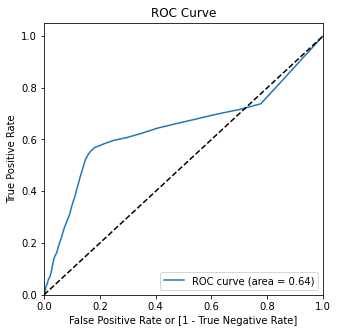

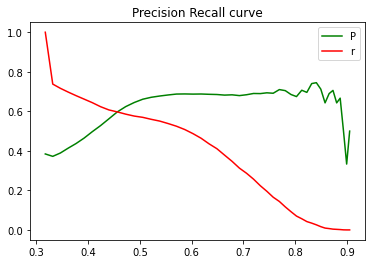

LogisticRegression(C=1.0, class_weight={0: 0.4, 1: 0.6}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [654]:
input_cols = ['totalTimeSpentBucketed']
build_model(X_train[input_cols], y_train, class_weight_0=0.4)

##### itr2 - ['totalTimeSpentBucketed', 'pageViewBucketed']

Evaluating model on Train set
Accuracy Score
--------------------
0.71

Confusion Matrix
--------------------
[[3724  758]
 [1321 1479]]

Precision Score
--------------------
0.66

recall Score
--------------------
0.53

F1 Score
--------------------
0.59


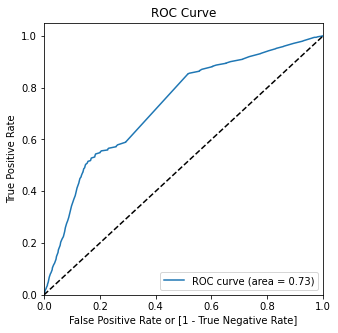

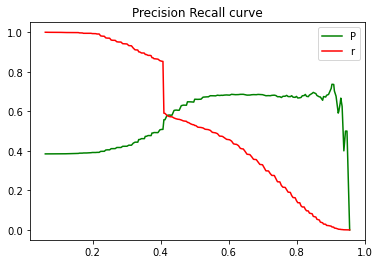

LogisticRegression(C=1.0, class_weight={0: 0.4, 1: 0.6}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [655]:

input_cols = ['totalTimeSpentBucketed', 'pageViewBucketed']
build_model(X_train[input_cols], y_train, class_weight_0=0.4)

##### itr3 - ['totalTimeSpentBucketed', 'pageViewBucketed', 'totalVisitsBucketed']

Evaluating model on Train set
Accuracy Score
--------------------
0.71

Confusion Matrix
--------------------
[[3729  753]
 [1331 1469]]

Precision Score
--------------------
0.66

recall Score
--------------------
0.52

F1 Score
--------------------
0.59


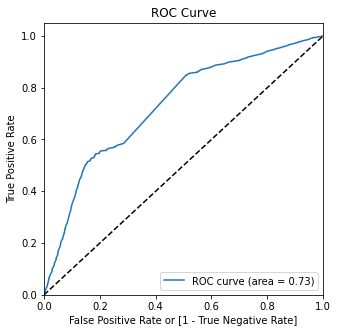

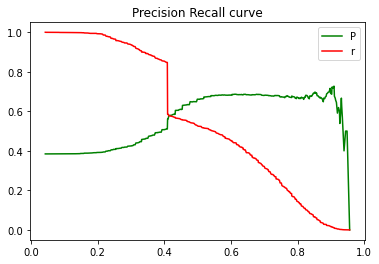

LogisticRegression(C=1.0, class_weight={0: 0.4, 1: 0.6}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [656]:
input_cols = ['totalTimeSpentBucketed', 'pageViewBucketed', 'totalVisitsBucketed']
build_model(X_train[input_cols], y_train, class_weight_0=0.4)

##### itr4 - ['totalTimeSpentBucketed', 'pageViewBucketed', 'email', 'masteringInterview']

Evaluating model on Train set
Accuracy Score
--------------------
0.71

Confusion Matrix
--------------------
[[3717  765]
 [1320 1480]]

Precision Score
--------------------
0.66

recall Score
--------------------
0.53

F1 Score
--------------------
0.59


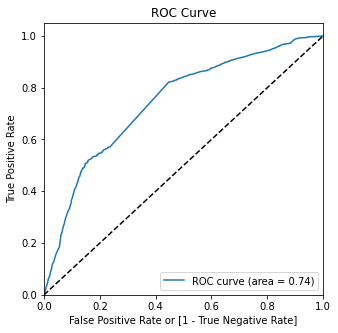

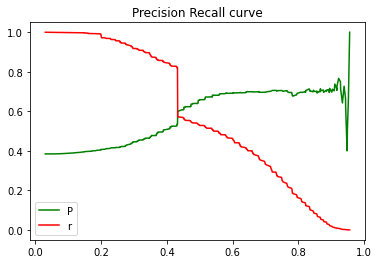

LogisticRegression(C=1.0, class_weight={0: 0.4, 1: 0.6}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [657]:
input_cols = ['totalTimeSpentBucketed', 'pageViewBucketed', 'email','masteringInterview'] #, 'digitalAdvert']
build_model(X_train[input_cols], y_train, class_weight_0=0.4)

##### itr5 - ['totalTimeSpentBucketed', 'pageViewBucketed', 'email', 'masteringInterview', 'leadOrgn']

Evaluating model on Train set
Accuracy Score
--------------------
0.79

Confusion Matrix
--------------------
[[3791  691]
 [ 872 1928]]

Precision Score
--------------------
0.74

recall Score
--------------------
0.69

F1 Score
--------------------
0.71


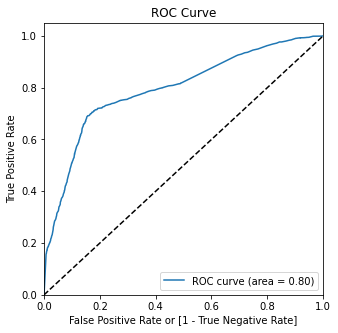

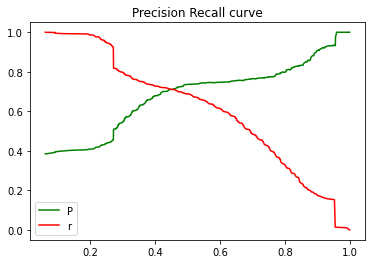

LogisticRegression(C=1.0, class_weight={0: 0.4, 1: 0.6}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [658]:
input_data = pd.concat([X_train[input_cols], leadOrgnDf.iloc[train_idx]], axis=1)
build_model(input_data, y_train, class_weight_0=0.4)

##### itr6 - ['totalTimeSpentBucketed', 'pageViewBucketed', 'email', 'masteringInterview', 'leadOrgn', 'leadSrc']

Evaluating model on Train set
Accuracy Score
--------------------
0.78

Confusion Matrix
--------------------
[[3791  691]
 [ 894 1906]]

Precision Score
--------------------
0.73

recall Score
--------------------
0.68

F1 Score
--------------------
0.71


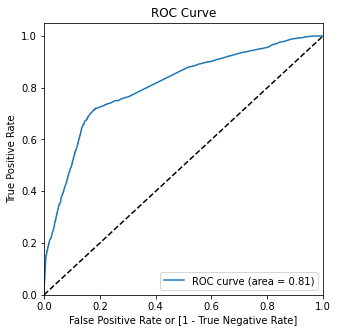

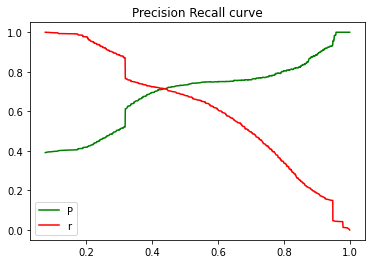

LogisticRegression(C=1.0, class_weight={0: 0.4, 1: 0.6}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [659]:
input_data = pd.concat([X_train[input_cols], leadOrgnDf.iloc[train_idx], leadSrcDf.iloc[train_idx]], axis=1)
build_model(input_data, y_train, class_weight_0=0.4)

##### itr7 - ['totalTimeSpentBucketed', 'pageViewBucketed', 'email', 'masteringInterview', 'leadOrgn', 'leadSrc', 'specialization']

Evaluating model on Train set
Accuracy Score
--------------------
0.79

Confusion Matrix
--------------------
[[3721  761]
 [ 803 1997]]

Precision Score
--------------------
0.72

recall Score
--------------------
0.71

F1 Score
--------------------
0.72


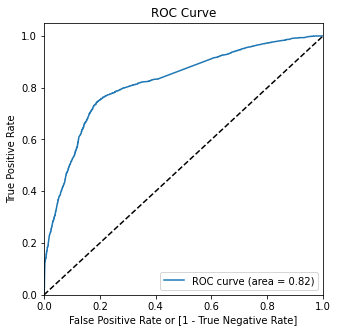

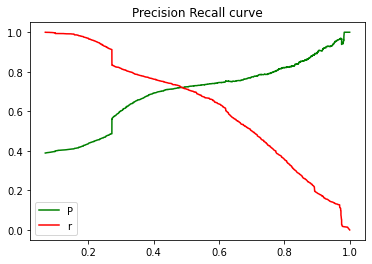

LogisticRegression(C=1.0, class_weight={0: 0.4, 1: 0.6}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [660]:
input_data = pd.concat([X_train[input_cols], leadOrgnDf.iloc[train_idx], leadSrcDf.iloc[train_idx], specializationDf.iloc[train_idx] ], axis=1)
build_model(input_data, y_train, class_weight_0=0.4)

##### itr8 - ['totalTimeSpentBucketed', 'pageViewBucketed', 'email', 'masteringInterview', 'leadOrgn', 'leadSrc', 'specialization', 'matterMost']

Evaluating model on Train set
Accuracy Score
--------------------
0.79

Confusion Matrix
--------------------
[[3774  708]
 [ 815 1985]]

Precision Score
--------------------
0.74

recall Score
--------------------
0.71

F1 Score
--------------------
0.72


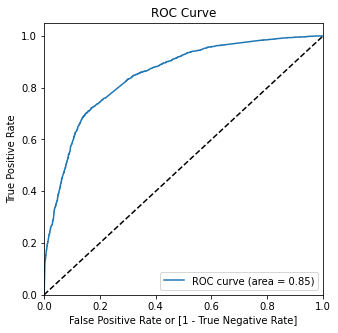

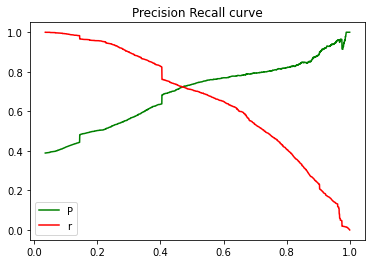

LogisticRegression(C=1.0, class_weight={0: 0.4, 1: 0.6}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [661]:
input_data = pd.concat([X_train[input_cols], leadOrgnDf.iloc[train_idx], leadSrcDf.iloc[train_idx],
                        specializationDf.iloc[train_idx], matterMostDf.iloc[train_idx] ], axis=1)
build_model(input_data, y_train, class_weight_0=0.4)

#### final model

Evaluating model on Train set
Accuracy Score
--------------------
0.79

Confusion Matrix
--------------------
[[3774  708]
 [ 815 1985]]

Precision Score
--------------------
0.74

recall Score
--------------------
0.71

F1 Score
--------------------
0.72


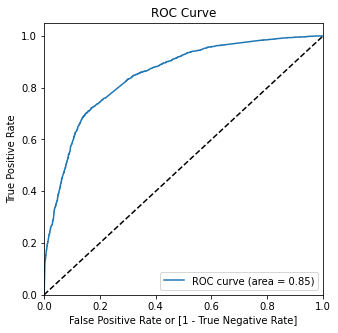

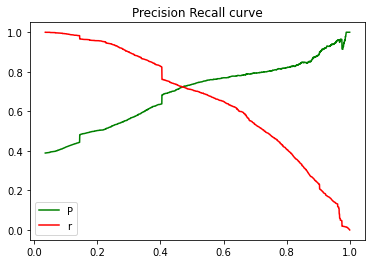

In [662]:
input_cols = ['totalTimeSpentBucketed', 'pageViewBucketed', 'email', 'masteringInterview'] 
# input_data = pd.concat([X_train[input_cols], leadOrgnDf.iloc[train_idx], leadSrcDf.iloc[train_idx], lastActivityDf.iloc[train_idx],matterMostDf.iloc[train_idx] ], axis=1)
input_data = pd.concat([X_train[input_cols], leadOrgnDf.iloc[train_idx], leadSrcDf.iloc[train_idx], specializationDf.iloc[train_idx], matterMostDf.iloc[train_idx] ], axis=1)
final_model = build_model(input_data, y_train, class_weight_0=0.4)

# Testing final model on Test data

In [663]:
input_cols = ['totalTimeSpentBucketed', 'pageViewBucketed', 'email', 'masteringInterview'] 
input_data = pd.concat([X_test[input_cols], leadOrgnDf.iloc[test_idx], leadSrcDf.iloc[test_idx], specializationDf.iloc[test_idx], matterMostDf.iloc[test_idx] ], axis=1)
input_data

,totalTimeSpentBucketed,pageViewBucketed,email,masteringInterview,API,Landing Page Submission,Lead Add Form,Lead Import,Click2call,Direct Traffic,Facebook,Google,Live Chat,NC_EDM,Olark Chat,Organic Search,Pay per Click Ads,Press_Release,Reference,Referral Sites,Social Media,WeLearn,Welingak Website,bing,blog,google,testone,welearnblog_Home,youtubechannel,"Banking, Investment And Insurance",Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Select,Services Excellence,Supply Chain Management,Travel and Tourism,Better Career Prospects,Flexibility & Convenience,Other
7875,5,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4233,3,2,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
5376,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2157,9,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3684,3,2,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
7871,4,2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
196,8,2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
8868,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [664]:
y_test_pred = final_model.predict(input_data)

print('Test Stats')
print("="*30)
print(f'Accuracy: {round(accuracy_score(y_test, y_test_pred),2)}')
print(f'Precision: {round(precision_score(y_test, y_test_pred),2)}')
print(f'Recall :{round(recall_score(y_test, y_test_pred), 2)}')
print(f'f1 score: {round(f1_score(y_test, y_test_pred),2)}')
print('='*30)


Test Stats
Accuracy: 0.81
Precision: 0.75
Recall :0.73
f1 score: 0.74


 - Final model is performing well on test data as compared to train dataset

# Adjusting the threshold value to get desired precision, recall value

In [665]:
input_cols = ['totalTimeSpentBucketed', 'pageViewBucketed', 'email', 'masteringInterview'] 
input_data = pd.concat([X_train[input_cols], leadOrgnDf.iloc[train_idx], leadSrcDf.iloc[train_idx],specializationDf.iloc[train_idx], matterMostDf.iloc[train_idx] ], axis=1)

y_train_prob = final_model.predict_proba(input_data)

In [666]:
i = 0.1
while i < 1:
  y_pred = np.where(y_train_prob[:,1] < i, 0, 1)
  print(f'Threshold Value: {i}')
  print('-' * 20)
  print(f'Accuracy: {round(accuracy_score(y_train, y_pred),2)}')
  print('Confusion Matrix')
  print(confusion_matrix(y_train, y_pred))
  print(f'Precision Score: {round(precision_score(y_train, y_pred), 2)}')
  print(f'Recall Score: {round(recall_score(y_train, y_pred),2)}')
  print()
  print()
  i = i + 0.1

  

Threshold Value: 0.1
--------------------
Accuracy: 0.47
Confusion Matrix
[[ 628 3854]
 [  22 2778]]
Precision Score: 0.42
Recall Score: 0.99


Threshold Value: 0.2
--------------------
Accuracy: 0.62
Confusion Matrix
[[1832 2650]
 [ 120 2680]]
Precision Score: 0.5
Recall Score: 0.96


Threshold Value: 0.30000000000000004
--------------------
Accuracy: 0.69
Confusion Matrix
[[2513 1969]
 [ 279 2521]]
Precision Score: 0.56
Recall Score: 0.9


Threshold Value: 0.4
--------------------
Accuracy: 0.75
Confusion Matrix
[[3154 1328]
 [ 482 2318]]
Precision Score: 0.64
Recall Score: 0.83


Threshold Value: 0.5
--------------------
Accuracy: 0.79
Confusion Matrix
[[3774  708]
 [ 815 1985]]
Precision Score: 0.74
Recall Score: 0.71


Threshold Value: 0.6
--------------------
Accuracy: 0.79
Confusion Matrix
[[3939  543]
 [ 981 1819]]
Precision Score: 0.77
Recall Score: 0.65


Threshold Value: 0.7
--------------------
Accuracy: 0.77
Confusion Matrix
[[4094  388]
 [1306 1494]]
Precision Score: 0.79

# Provide score

  - Higher score value from 400 more is the chance of conversion
  - Lower score value from 400 less is the chance of conversion

In [667]:
import math
def get_score(prob):
  odds = prob/(1 - prob)
  score = 400 + 20 * (math.log(odds) / math.log(2))
  return score

In [668]:
input_cols = ['totalTimeSpentBucketed', 'pageViewBucketed', 'email', 'masteringInterview'] 
input_data = pd.concat([X_train[input_cols], leadOrgnDf.iloc[train_idx], leadSrcDf.iloc[train_idx],specializationDf.iloc[train_idx], matterMostDf.iloc[train_idx] ], axis=1)
y_train_prob = final_model.predict_proba(input_data)

In [669]:
scoreDf = pd.DataFrame({'index': train_idx, 'score': [math.floor(get_score(i)) for i in y_train_prob[:,1]]})
scoreDf.head()

,index,score
0,8709,381
1,5157,351
2,7341,344
3,3396,451
4,5894,430


# Conclusion

**Important predictors**

The important predictors in decreasing order of importance are as follows :-
- leadOrgn
- leadSrc
- totalTimeSpent
- specialization
- masteringInterview
- pageView
- matterMost
- Email

**Threshold Value**

- The model is ready which will tell if the lead is hot lead or not.  The sales team can use the model to find the hot leads.


- Depending upon the strategies, the sales team and choose the following threshold value
    - When the team has aggressive approach and wants to call all potential leads.
        - The team can choose  the threshold value of **0.2** and get the hot leads from the model.
    - When the team has relaxed approach and wants to make only necessary call.
        - The team can choose the threshold value of **0.9** and get hot lead which has highest percentage of getting converted.

**Score**

- Each lead has been provided the score.
- Higher score value from 400 more is the chance of conversion
- Lower score value from 400 less is the chance of conversion
